In [1]:
#!/usr/bin/env python
# coding: utf-8

#specs:
    M/M/1 has infinite buffer while M/M/1/K has only size of K packets
    
    𝐹(𝑥) = 1 − 𝑒^(−𝜆)
    𝒙 = − (𝟏/𝝀) 𝒍𝒏(𝟏 − 𝑼)
    where U is a uniformly generated number and 𝑥 is the exponential random variable

In [2]:
# • λ = Average number of packets generated /arrived (packets per second)
# • L = Average length of a packet in bits.
# • α = Average number of observer events per second
# • C = The transmission rate of the output link in bits per second.
# • ρ = Utilization of the queue (= input rate/service rate = L λ/C)
# • E[N] = Average number of packets in the buffer/queue
# • PIDLE = The proportion of time the server is idle, i.e., no packets in the queue nor a packet is being transmitted.
# • PLOSS = The packet loss probability (for M/M/1/K queue). It is the ratio of the total number of packets lost due to
# buffer full condition to the total number of generated packets.

In [3]:
#simulation Time T
#queue events with
# ----- Packet arrival
# ----- Packet departure
# ----- Observer


In [4]:
from random import seed
from random import random
import numpy as np
import math
import matplotlib.pyplot as plt
import heapq

seed(358)
L = 2000
mil = C_rate = 1000000
lambda_alpha_factor = 5

In [5]:
#Q1 1000 erv with lamba = 75
# get mean and variance of the 1000 rv

def exp_rad_var(lambda_value):
    return -1 * (math.log(1 - random())) / lambda_value

def mean_variance(data):
    mean = sum(data) / len(data)
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / len(data)
    return mean,variance

def mean_variance_calculator(total_count, lambda_value):
    rad_list = [exp_rad_var(lambda_value) for _ in range(total_count)]
    expected_mean = 1/lambda_value
    expected_variance = expected_mean/lambda_value
    mean,variance = mean_variance(rad_list)
    return mean,variance,expected_mean,expected_variance

In [6]:
exp_rad_var(1/2000)

2894.5269161164233

## Q1

In [7]:
m,v,em,ev = mean_variance_calculator(1000,75)

In [8]:
print("mean:        ",m , "   variance:        ", v)
print("expect mean: ",em , "   expect variance: ", ev)


mean:         0.013663521938766698    variance:         0.00019549101399417157
expect mean:  0.013333333333333334    expect variance:  0.00017777777777777779


## Q2-3-4 M/M/1 Queue

In [36]:
def infinite_buffer_event_list(Time,lambda_value,L=2000):
    #get observer rate from lambda_value (5 times as default)
    alpha = lambda_alpha_factor * lambda_value
    #initialization of time stream:
    departureStream = 0 
    arrivalStream = 0
    observerStream = 0
    
    #lists to hold times
    departureStream_list = []
    arrivalStream_list = []
    observerStream_list = []
    
    #get data packets running ...
    #start of simulation 
    while observerStream < Time: 
        # set up timestamps where observer checks the queue
        observerStream = exp_rad_var(alpha) + observerStream
        observerStream_list.append(observerStream) 
        
    while arrivalStream < Time:
        # set up arrival time and package size for each request throughout the queue
        arrivalStream = exp_rad_var(lambda_value) + arrivalStream
        packet_size = exp_rad_var(1/L)
        #observerStream = packet_size/C_rate
        service_time = packet_size/C_rate 
        
        arrivalStream_list.append(arrivalStream)
        # the first packet arrival T is d
        # If the queue is idle, then the departure time of packet 
        # will be its arrival time plus its transmission time (service time)
        # otherwise it would simply be departure time plus service time
        departureStream = arrivalStream + service_time if(arrivalStream > departureStream) else departureStream + service_time
        departureStream_list.append(departureStream)
    
    event_list = []
    for d in departureStream_list:
        event_list.append((d,"Departure"))
    for a in arrivalStream_list:
        event_list.append((a,"Arrival"))
    for o in observerStream_list:
        event_list.append((o,"Observer"))
        
    # put all the events in a list then sort them according to time
    event_list.sort(key=lambda tup: tup[0], reverse=False)
    return event_list,departureStream_list,arrivalStream_list,observerStream_list

def infinite_buffer_calculation(data):
    arrival_count = 0 
    departure_count = 0 
    observer_count = 0 
    idle_c = 0
    avg_packet_list = []
    for key in data:
        if(key[1] == 'Arrival'):
            arrival_count = arrival_count + 1
        elif(key[1] == 'Departure'):
            departure_count = departure_count + 1
        elif(key[1] == 'Observer'):
            observer_count = observer_count + 1
            packets_in_buffer = arrival_count - departure_count
            if(packets_in_buffer == 0):
                idle_c = idle_c + 1
            else:
                avg_packet_list.append(packets_in_buffer)
                
    p_idle = idle_c / observer_count
    avg_packet = sum(avg_packet_list)/len(avg_packet_list)
    return p_idle, avg_packet
                
    
    
        

In [37]:
def plot_q3_4():
    plt.title("E[N] - Rho ")
    plt.plot(rho_list, EN, marker='.')
    plt.xlabel('Rho values')
    plt.ylabel('Average # of packets ')
    plt.show()
    plt.close()


    plt.title("Pidle - Rho")
    plt.xlabel('Rho values')
    plt.ylabel('Percent of idle system')
    plt.plot(rho_list, PIDLE, marker='.')
    plt.show()
    plt.close()

In [38]:
##### with infinite buffer 
## due to the accuracy of the adding of decimals, we hardcode the sequence
#https://stackoverflow.com/questions/588004/is-floating-point-math-broken
rho_list = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

def queue_with_infinite_buffer(Time,L=2000,C=C_rate):
    round_index = 0
    # two lists to hold the records of packets and IDLE ratio for each Rho value
    total_avg_packet = []
    total_p_idle = []
    # start processing
    for rho in rho_list:
        round_index = round_index + 1 
        # ---------- getting lambda value -----------
        lambda_value = rho / L * C
        print("PROCESS # ", round_index, "   rho: ", rho, "   lambda: ", lambda_value)
        # generate events list from DES generator 
        events,_,_,_ = infinite_buffer_event_list(Time,lambda_value,L)
        pidle,avg_packet = infinite_buffer_calculation(events)
        print("P idle: ", pidle, "  E[N]: ", avg_packet )
        total_avg_packet.append(avg_packet)
        total_p_idle.append(pidle)
        
    return total_avg_packet,total_p_idle
      
    

PROCESS #  1    rho:  0.25    lambda:  125.0
P idle:  0.7506162786984705   E[N]:  1.3339137894608801
PROCESS #  2    rho:  0.35    lambda:  175.0
P idle:  0.6483681629366662   E[N]:  1.5320767604488534
PROCESS #  3    rho:  0.45    lambda:  225.0
P idle:  0.5459855791441304   E[N]:  1.8246186660404864
PROCESS #  4    rho:  0.55    lambda:  275.0
P idle:  0.44859153905443333   E[N]:  2.217318317882716
PROCESS #  5    rho:  0.65    lambda:  325.0
P idle:  0.350641691015587   E[N]:  2.847197545588829
PROCESS #  6    rho:  0.75    lambda:  375.0
P idle:  0.25081206161893116   E[N]:  3.9812719021493073
PROCESS #  7    rho:  0.85    lambda:  425.0
P idle:  0.15034177038755953   E[N]:  6.588141600277104
PROCESS #  8    rho:  0.95    lambda:  475.0
P idle:  0.05180431484914883   E[N]:  18.78264136823422


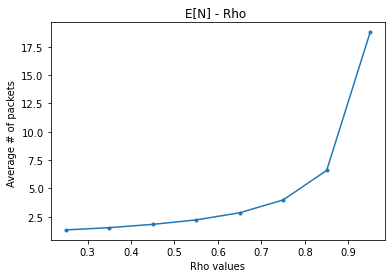

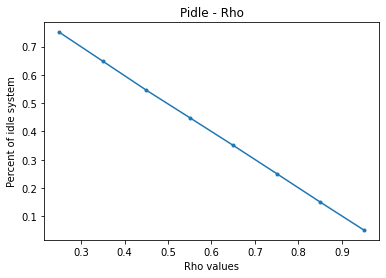

In [39]:
EN,PIDLE = queue_with_infinite_buffer(1000)
plot_q3_4()

PROCESS #  1    rho:  0.25    lambda:  125.0
P idle:  0.7503050039828287   E[N]:  1.3332576058158734
PROCESS #  2    rho:  0.35    lambda:  175.0
P idle:  0.6502556880753838   E[N]:  1.5338045081378806
PROCESS #  3    rho:  0.45    lambda:  225.0
P idle:  0.5485105656319679   E[N]:  1.8181788632940892
PROCESS #  4    rho:  0.55    lambda:  275.0
P idle:  0.44946696690699933   E[N]:  2.228094854642785
PROCESS #  5    rho:  0.65    lambda:  325.0
P idle:  0.35051143775914645   E[N]:  2.8451517891157625
PROCESS #  6    rho:  0.75    lambda:  375.0
P idle:  0.25066627183891027   E[N]:  4.009180253163656
PROCESS #  7    rho:  0.85    lambda:  425.0
P idle:  0.14872699737516493   E[N]:  6.746395343112443
PROCESS #  8    rho:  0.95    lambda:  475.0
P idle:  0.04584105044280762   E[N]:  22.434366404518016


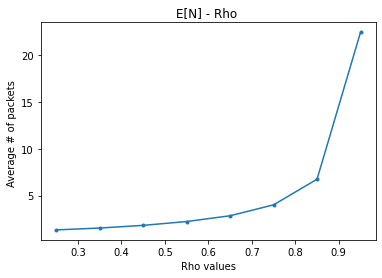

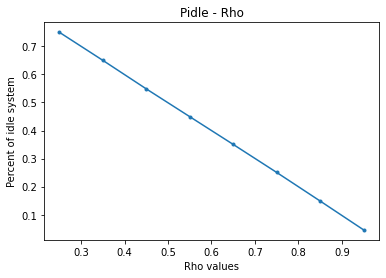

In [40]:
EN,PIDLE = queue_with_infinite_buffer(2000)
plot_q3_4()

## Q4

In [41]:
rho_list = [1.2]
EN,PIDLE = queue_with_infinite_buffer(1000)
# EN,PIDLE = queue_with_infinite_buffer(2000)
# EN,PIDLE = queue_with_infinite_buffer(3000)

PROCESS #  1    rho:  1.2    lambda:  600.0
P idle:  9.334811345129645e-06   E[N]:  50608.66412068423


## Q5 M/M/1/K queue

In [15]:
def finite_buffer_event_list(Time,lambda_value,L=2000):
    #get observer rate from lambda_value (5 times as default)
    alpha = lambda_alpha_factor * lambda_value
    #initialization of time stream:
    
    #departureStream = 0 
    arrivalStream = 0
    observerStream = 0
    
    event_list = []
    #get data packets running ...
    #start of simulation 
    
    
    # set up timestamps where observer checks the queue  
    while observerStream < Time:
        observerStream = exp_rad_var(alpha) + observerStream
        event_list.append((observerStream,"Observer"))
        
    # set up arrival time and package size for each request throughout the queue
    while arrivalStream < Time:
        arrivalStream = exp_rad_var(lambda_value) + arrivalStream
        event_list.append((arrivalStream,"Arrival"))
        
    # put all the events in a list then sort them according to time
    event_list.sort(key=lambda tup: tup[0], reverse=False)
    return event_list

def finite_buffer_calculation(event_list,K):
    arrival_count = 0 
    departure_count = 0
    observer_count = 0 
    
    idle_c = 0
    loss_c = 0
    
    avg_packet_list = []

    number_in_queue = 0
    #packet_count = 0
    packet_size = 0
    service_time = 0
    
    #calculations for generating departure stream 
    departureStream_list = []
    departureStream = 0 

    while len(event_list) > 0:
        # grab the first item(the smallest timestamp)
        event = heapq.heappop(event_list)
        if(event[1] == 'Arrival'):
            # packet_count = packet_count + 1 
            # if queue is not FULL, we update number of packets in the buffer
            # then fire a departure event based on arrival time
            if(number_in_queue < K): 
                number_in_queue = number_in_queue + 1
                arrival_count = arrival_count + 1           
                service_time = (exp_rad_var(1/L))/C_rate
                if(departureStream < event[0]):
                    departureStream = service_time + event[0]
                else:
                    departureStream = departureStream + service_time
                
                # departure event added to list
                event_list.append((departureStream,"Departure"))
                
            # when queue is full, the packet is lost 
            else:
                loss_c = loss_c + 1
   
        elif(event[1] == 'Departure'):
            #print("departure")
            departure_count = departure_count + 1
            number_in_queue = number_in_queue - 1
            
            
        elif(event[1] == 'Observer'):
            #print("observer")
            observer_count = observer_count + 1
            avg_packet_list.append(arrival_count - departure_count)
    
    p_loss = loss_c/(loss_c + arrival_count)
    #p_new_loss = loss_c / packet_count
    avg_packet = sum(avg_packet_list)/len(avg_packet_list)
    
    return p_loss, avg_packet
        

In [16]:
a= [1,3,4,5,6,63,9]
a[0:4]

[1, 3, 4, 5]

In [31]:
def plot_q5_6(EN,PIDLE):
    EN_10 = []
    EN_25 = []
    EN_50 = []
    EN_10 = EN[0:11]
    EN_25 = EN[11:12+10]
    EN_50 = EN[12+10:]
#     print(rho_list_second)
#     print(EN_10)
#     print(EN_25)
#     print(EN_50)
    plt.title("E[N] - Rho ")
    plt.plot(rho_list_second, EN_10,label="K = 10",marker='.')
    plt.plot(rho_list_second, EN_25,label="K = 25",marker='.')
    plt.plot(rho_list_second, EN_50,label="K = 50",marker='.')
    plt.xlabel('Rho values')
    plt.ylabel('Average # of packets ')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()
    
    
    
    PIDLE_10 = []
    PIDLE_25 = []
    PIDLE_50 = []
    PIDLE_10 = PIDLE[0:11]
    PIDLE_25 = PIDLE[11:12+10]
    PIDLE_50 = PIDLE[12+10:]
    plt.title("Pidle - Rho")
    plt.xlabel('Rho values')
    plt.ylabel('Percent of idle system')
    plt.plot(rho_list_second, PIDLE_10,label="K = 10",marker='.')
    plt.plot(rho_list_second, PIDLE_25,label="K = 25",marker='.')
    plt.plot(rho_list_second, PIDLE_50,label="K = 50",marker='.')
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

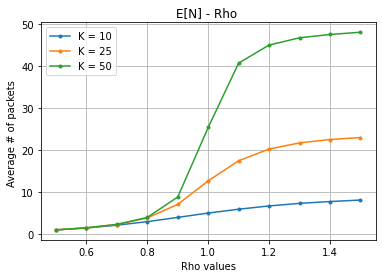

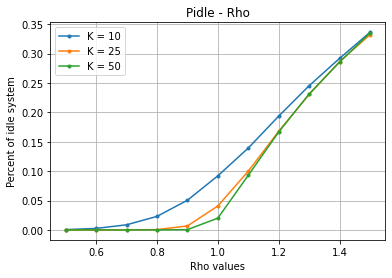

In [32]:
plot_q5_6(tv,tloss)

In [18]:
rho_list_second = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
packet_list = [10, 25, 50]
def queue_with_finite_buffer(Time,L=2000,C=C_rate):
    # start processing
    round_index = 0
    total_avg = []
    total_p_loss = []
    for K in packet_list:
        for rho in rho_list_second:
            round_index = round_index + 1 
            # ---------- getting lambda value
            lambda_value = rho / L * C
            print("PROCESS # ", round_index, "   rho: ", rho, "   lambda: ", lambda_value, "  K:", K)
            eve = finite_buffer_event_list(Time,lambda_value,L)
            #print("长度: " , len(eve))
            ploss,e_n = finite_buffer_calculation(eve,K)
            print("P loss: ", ploss, "  E[N]: ", e_n )
            total_avg.append(e_n)
            total_p_loss.append(ploss)
        print("------------------------------------------------------------------------------------")
    return total_avg,total_p_loss

In [19]:
tv, tloss = queue_with_finite_buffer(1000)


PROCESS #  1    rho:  0.5    lambda:  250.0   K: 10
P loss:  0.0005279176448474038   E[N]:  1.0181269968338276
PROCESS #  2    rho:  0.6    lambda:  300.0   K: 10
P loss:  0.0025473422728952795   E[N]:  1.4770730997974861
PROCESS #  3    rho:  0.7    lambda:  350.0   K: 10
P loss:  0.008710841172709836   E[N]:  2.14172814240024
PROCESS #  4    rho:  0.8    lambda:  400.0   K: 10
P loss:  0.02299612520418348   E[N]:  2.9796690789964186
PROCESS #  5    rho:  0.9    lambda:  450.0   K: 10
P loss:  0.05046633022446517   E[N]:  3.991852814122441
PROCESS #  6    rho:  1.0    lambda:  500.0   K: 10
P loss:  0.09200788998782927   E[N]:  5.025862510073811
PROCESS #  7    rho:  1.1    lambda:  550.0   K: 10
P loss:  0.13928855134453216   E[N]:  5.934682914046122
PROCESS #  8    rho:  1.2    lambda:  600.0   K: 10
P loss:  0.1935762528141416   E[N]:  6.716904278342822
PROCESS #  9    rho:  1.3    lambda:  650.0   K: 10
P loss:  0.24532584525387605   E[N]:  7.3257246931181434
PROCESS #  10    rho:

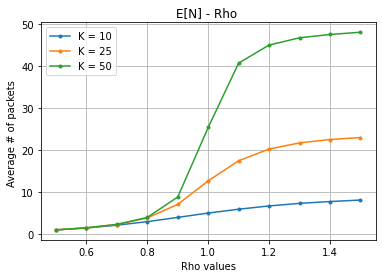

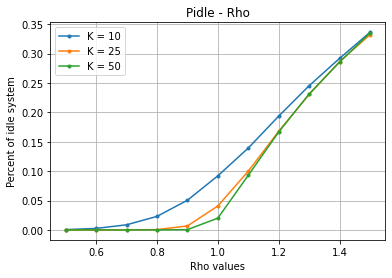

In [27]:
plot_q5_6(tv,tloss)

In [ ]:
# def main():
#     rho_list_second = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
#     packet_list = [10, 25, 50]
#     queue_with_finite_buffer(100)
    

# if __name__ == '__main__':
#     main()